Setting up necessary necessary things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8
version=0

In [2]:
!pip install -Uqq fastai fastbook nbdev
!pip install fastcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00


In [3]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import ImageClassifierCleaner

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Art Style Recognizer

/content/drive/MyDrive/Art Style Recognizer


Download Images from Browser

In [6]:
doc(search_images_ddg)

In [7]:
art_labels= [
    "Art Nouveau",
    "Cubism Art",
    "Pop Art",
    "Pointillism Art",
    "Fauvism Art",
    "Minimalism Art",
    "Gothic Art",
    "Prehistoric Art",
    "Dadaism Art",
    "Constructivism Art"
]
len(art_labels)

10

Download Images

In [8]:
doc(download_images)

In [9]:
data_path="data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for art_type in art_labels:
  dest=f"{data_path}/{art_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)


  try:
    art_image_urls= search_images_ddg(art_type)
    download_images(dest, urls=art_image_urls)
    print(f"{len(art_image_urls)} images downloaded in destination: {dest}")
  except:
    continue

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


200 images downloaded in destination: data/Art Nouveau
200 images downloaded in destination: data/Cubism Art
200 images downloaded in destination: data/Pop Art
200 images downloaded in destination: data/Pointillism Art
200 images downloaded in destination: data/Fauvism Art
200 images downloaded in destination: data/Minimalism Art
200 images downloaded in destination: data/Gothic Art
200 images downloaded in destination: data/Prehistoric Art
200 images downloaded in destination: data/Dadaism Art
200 images downloaded in destination: data/Constructivism Art


In [10]:
doc(get_image_files)

Download Images from Browser

In [11]:
image_counts=get_image_files(data_path)
image_counts

(#1890) [Path('data/Art Nouveau/d9133444-8311-45b5-8ced-7b6cff9e45a7.jpg'),Path('data/Art Nouveau/11cc85e2-8719-4b1b-8663-2b684a2dbba8.jpg'),Path('data/Art Nouveau/00bc9fff-281e-40b2-b6e1-e3128ee8b43b.png'),Path('data/Art Nouveau/136e555c-dfad-438e-993d-57806473e5ef.jpg'),Path('data/Art Nouveau/cc598fa6-01d5-4870-9d25-989e51ac1d23.jpg'),Path('data/Art Nouveau/5ded8f73-6ef9-4cba-b1fe-9ede27427274.jpg'),Path('data/Art Nouveau/2bf23a4c-db38-4592-8b8b-ed357c06c6a7.jpg'),Path('data/Art Nouveau/4511c4bf-9385-4c75-bbe8-269fe5e25fc3.jpg'),Path('data/Art Nouveau/0aee6413-0f94-4b40-a114-2dee71abd6c9.jpg'),Path('data/Art Nouveau/e6389a4d-5953-4ef6-86cb-6f64c1234a9e.jpg')...]

In [12]:
failed= verify_images(image_counts)
failed

(#25) [Path('data/Art Nouveau/136e555c-dfad-438e-993d-57806473e5ef.jpg'),Path('data/Art Nouveau/9c56c459-9045-4b22-9eba-5faa1fb6fce7.jpg'),Path('data/Art Nouveau/76314d15-7138-4b06-ab67-a57d998542ff.jpg'),Path('data/Art Nouveau/65c82157-2705-431e-b1d3-6edb6880e20d.jpg'),Path('data/Art Nouveau/faf53485-63d1-4ad7-a766-05a373360afb.png'),Path('data/Art Nouveau/de3cdfd3-1895-4f8c-b344-0af4f391881b.jpg'),Path('data/Art Nouveau/65bd1d61-c18e-4ba3-90b8-3049cf38ceec.jpg'),Path('data/Art Nouveau/d915b578-cf92-4cfd-82b5-f9a83715556d.jpg'),Path('data/Cubism Art/f0e384e3-8a78-42da-9300-e41479d1fc6d.jpg'),Path('data/Cubism Art/52a3f25b-b969-467f-b5d9-71e46de6d141.jpg')...]

In [13]:
failed.map(Path.unlink)

(#25) [None,None,None,None,None,None,None,None,None,None...]

In [14]:
doc(Path.unlink)

In [15]:
doc(verify_images)

In [16]:
doc(DataBlock)

In [17]:
doc(parent_label)

In [18]:
doc(ImageBlock)

In [19]:
doc(CategoryBlock)

In [20]:
batch_size = 16

From Data to Data Loaders

In [21]:
dblock= DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items= get_image_files,                                 #get_image_files returns a list of all images in that path
    splitter= RandomSplitter(valid_pct=0.1, seed=42),           #getting 90-10 train validation split
    get_y= parent_label,                                        #taking the folder name as labels
    item_tfms= Resize(128)                                      #resize to get the image of same shape
)

In [22]:
dls= dblock.dataloaders(data_path,bs=bs)                        #setting up batch size for efficient GPU use

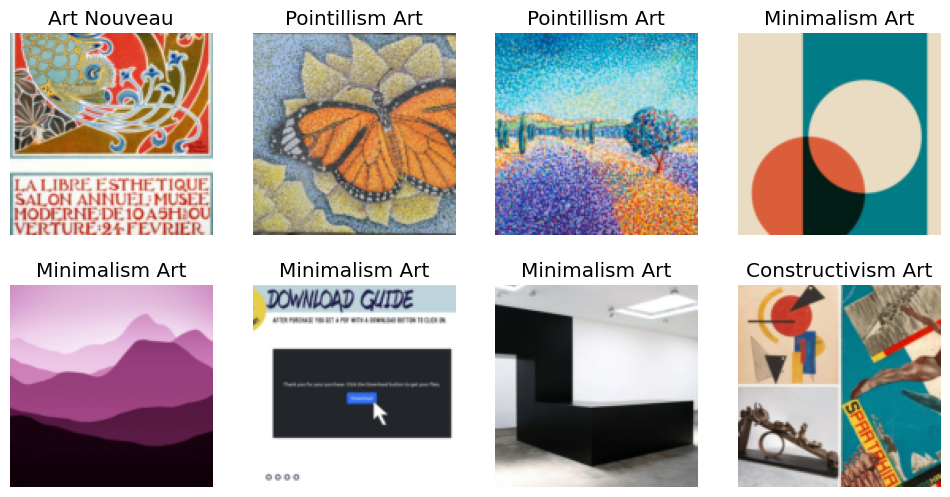

In [23]:
dls.train.show_batch(max_n=8, nrows=2)

Data Augmentation

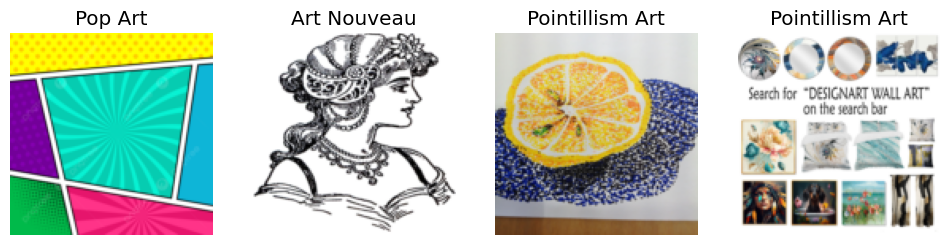

In [24]:
dblock=dblock.new(item_tfms=Resize(128, ResizeMethod.Squish))  #Squishing the whole image into (128X128) size
dls=dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

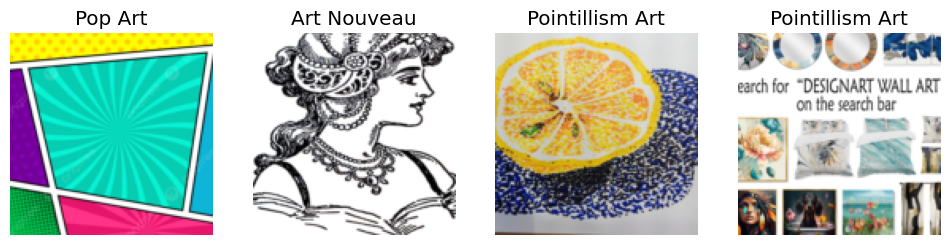

In [25]:
dblock=dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))  #Randomly croping, cutting, resizing, coloring parts of the image into (128X128) size
dls=dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [26]:
doc(aug_transforms)

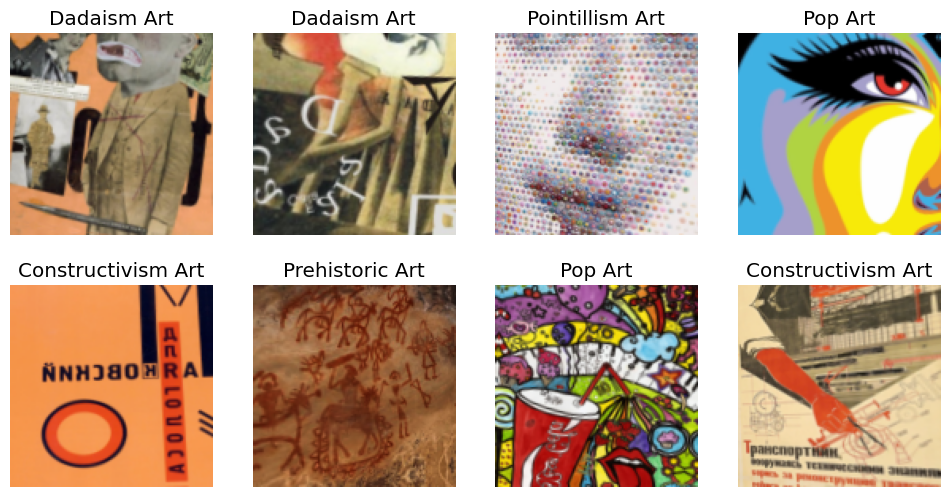

In [27]:
dblock=dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3), batch_tfms=aug_transforms())
dls=dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [28]:
torch.save(dls, "artStyle_dataloader_v0.pk1")